In [1]:
from fastai.vision import *
from fastai import *
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

path = './Training400'
bs = 64
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, 
	ds_tfms=get_transforms(), size=224)

data.normalize(imagenet_stats)



ImageDataBunch;

Train: LabelList (528 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
AMD,AMD,AMD,AMD,AMD
Path: Training400;

Valid: LabelList (132 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Non-AMD,AMD,Non-AMD,Non-AMD,AMD
Path: Training400;

Test: None

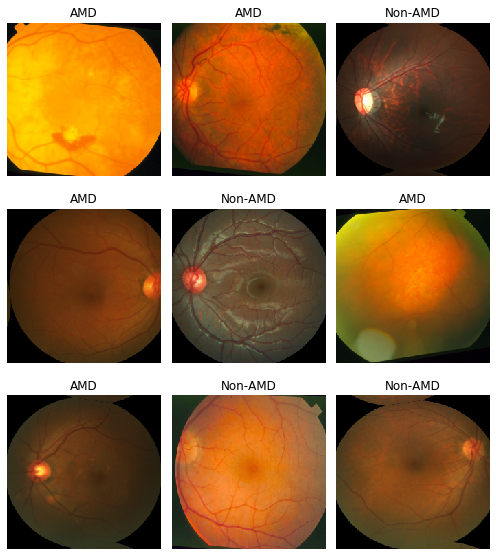

In [2]:
data.show_batch(rows=3, figsize=(7,8))


In [3]:
learn = cnn_learner(data, models.resnet18, metrics=error_rate)


In [4]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.723895,0.478617,0.219697,01:00
1,0.617760,0.378370,0.143939,01:00
2,0.515499,0.345877,0.143939,00:58
3,0.467074,0.339331,0.128788,00:58
4,0.424494,0.338488,0.136364,00:59


In [5]:
image = open_image('./amd/remidio-new-batch-512-512-newAlgo_Dr. Bhavin Patel-34720.jpg')
learn.predict(image)

(Category AMD, tensor(0), tensor([0.9960, 0.0040]))

In [7]:
import os
image = []
for file in os.listdir('./unclassified'):
    image += [open_image(os.path.join('.','unclassified',file))]


IsADirectoryError: [Errno 21] Is a directory: './unclassified/.ipynb_checkpoints'

In [8]:
len(image)

88

In [ ]:
learn.pred_batch(image)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

AttributeError: 'Image' object has no attribute 'ndim'

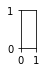

In [11]:
import numpy as np
show_images(np.array(image), 5)